# ***Step 2: Data Cleaning and Analysis in Python***

In [36]:
# 1. Load the scraped data (from CSV or DataFrame)

In [37]:
import pandas as pd

df = pd.read_csv("/content/cleaned_books.csv")  # or your raw scraped CSV

print(df.head())          # See first 5 rows


                                   title  price (£) availability rating  \
0                   A Light in the Attic      51.77     In stock  Three   
1                     Tipping the Velvet      53.74     In stock    One   
2                             Soumission      50.10     In stock    One   
3                          Sharp Objects      47.82     In stock   Four   
4  Sapiens: A Brief History of Humankind      54.23     In stock   Five   

                                                link  
0  https://books.toscrape.com/catalogue/a-light-i...  
1  https://books.toscrape.com/catalogue/tipping-t...  
2  https://books.toscrape.com/catalogue/soumissio...  
3  https://books.toscrape.com/catalogue/sharp-obj...  
4  https://books.toscrape.com/catalogue/sapiens-a...  


2. Inspect your data


Check data info and look for missing or inconsistent values:

In [3]:
print(df.info())          # Data types and null counts

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         200 non-null    object 
 1   price (£)     200 non-null    float64
 2   availability  200 non-null    object 
 3   rating        200 non-null    object 
 4   link          200 non-null    object 
dtypes: float64(1), object(4)
memory usage: 7.9+ KB
None


In [4]:
print(df.describe())      # Statistical summary for numerical data

        price (£)
count  200.000000
mean    34.796250
std     14.119272
min     10.160000
25%     21.990000
50%     35.640000
75%     46.110000
max     59.640000


In [5]:
print(df['availability'].value_counts())  # See unique availability values

availability
In stock    200
Name: count, dtype: int64


In [6]:
print(df['rating'].value_counts())

rating
One      49
Two      41
Four     38
Five     37
Three    35
Name: count, dtype: int64


**3. Data Cleaning**

Fix missing or inconsistent values

Convert data types if needed

Normalize categorical data

Create new useful columns

In [7]:
# Strip extra spaces in 'availability'
df['availability'] = df['availability'].str.strip()

# Convert 'availability' to numeric stock count (optional)
# e.g., "In stock (22 available)" → extract 22
import re
def extract_stock(text):
    match = re.search(r'\((\d+) available\)', text)
    return int(match.group(1)) if match else 0

df['stock'] = df['availability'].apply(extract_stock)

# Map textual ratings to numeric scores
rating_map = {'One': 1, 'Two': 2, 'Three': 3, 'Four': 4, 'Five': 5}
df['rating_num'] = df['rating'].map(rating_map)

# Check for missing values and fill or drop if necessary
print(df.isnull().sum())
# If needed, drop rows with missing values or fill them:
# df = df.dropna() or df.fillna(method='ffill', inplace=True)

# Remove duplicates if any
df = df.drop_duplicates()


title           0
price (£)       0
availability    0
rating          0
link            0
stock           0
rating_num      0
dtype: int64


**4. Basic Data Analysis & Summary(EDA)**





In [8]:
# Average price of books
print("Average book price:", df['price (£)'].mean())


Average book price: 34.79625


In [9]:
# Distribution of ratings
print(df['rating_num'].value_counts().sort_index())



rating_num
1    49
2    41
3    35
4    38
5    37
Name: count, dtype: int64


In [10]:

# Stock availability summary
print(df['stock'].describe())



count    200.0
mean       0.0
std        0.0
min        0.0
25%        0.0
50%        0.0
75%        0.0
max        0.0
Name: stock, dtype: float64


In [11]:

# Top 5 most expensive books
print(df.sort_values(by='price (£)', ascending=False).head())


                                                 title  price (£)  \
133  Thomas Jefferson and the Tripoli Pirates: The ...      59.64   
68        The Death of Humanity: and the Case for Life      58.11   
135  The White Cat and the Monk: A Retelling of the...      58.08   
100  Immunity: How Elie Metchnikoff Changed the Cou...      57.36   
186  I Had a Nice Time And Other Lies...: How to fi...      57.36   

    availability rating                                               link  \
133     In stock    One  https://books.toscrape.com/catalogue/thomas-je...   
68      In stock   Four  https://books.toscrape.com/catalogue/the-death...   
135     In stock   Four  https://books.toscrape.com/catalogue/the-white...   
100     In stock   Five  https://books.toscrape.com/catalogue/immunity-...   
186     In stock   Four  https://books.toscrape.com/catalogue/i-had-a-n...   

     stock  rating_num  
133      0           1  
68       0           4  
135      0           4  
100      0      

In [12]:

# Count of books by availability (in stock vs out of stock)
df['in_stock'] = df['stock'] > 0
print(df['in_stock'].value_counts())

in_stock
False    200
Name: count, dtype: int64


**Top Rated Books (Rating = 5)**

In [13]:
top_books = df[df['rating_num'] == 5].sort_values(by='price (£)', ascending=False)
print("📚 Top Rated Books:")
print(top_books[['title', 'price (£)', 'rating_num']].head(10))


📚 Top Rated Books:
                                                 title  price (£)  rating_num
100  Immunity: How Elie Metchnikoff Changed the Cou...      57.36           5
122  A Piece of Sky, a Grain of Rice: A Memoir in F...      56.76           5
124            A Flight of Arrows (The Pathfinders #2)      55.53           5
4                Sapiens: A Brief History of Humankind      54.23           5
127  (Un)Qualified: How God Uses Broken People to D...      54.00           5
193           Finders Keepers (Bill Hodges Trilogy #2)      53.53           5
13   Scott Pilgrim's Precious Little Life (Scott Pi...      52.29           5
142               The Regional Office Is Under Attack!      51.36           5
46                        We Love You, Charlie Freeman      50.27           5
184  Library of Souls (Miss Peregrine’s Peculiar Ch...      48.56           5


**Books with the Highest Price**

In [14]:
most_expensive = df.sort_values(by='price (£)', ascending=False).head(10)
print("💰 Most Expensive Books:")
print(most_expensive[['title', 'price (£)', 'rating_num']])


💰 Most Expensive Books:
                                                 title  price (£)  rating_num
133  Thomas Jefferson and the Tripoli Pirates: The ...      59.64           1
68        The Death of Humanity: and the Case for Life      58.11           4
135  The White Cat and the Monk: A Retelling of the...      58.08           4
100  Immunity: How Elie Metchnikoff Changed the Cou...      57.36           5
186  I Had a Nice Time And Other Lies...: How to fi...      57.36           4
40                      Slow States of Collapse: Poems      57.31           3
15   Our Band Could Be Your Life: Scenes from the A...      57.25           3
122  A Piece of Sky, a Grain of Rice: A Memoir in F...      56.76           5
58                                 The Past Never Ends      56.50           4
57   The Pioneer Woman Cooks: Dinnertime: Comfort C...      56.41           1


**Average Price per Rating Level**

In [15]:
avg_price_per_rating = df.groupby('rating_num')['price (£)'].mean().sort_index()
print("📊 Average Price per Rating:")
print(avg_price_per_rating)


📊 Average Price per Rating:
rating_num
1    34.585102
2    33.739756
3    36.191143
4    34.896579
5    34.824054
Name: price (£), dtype: float64


**Price Distribution Plot**

<ipython-input-16-2557491939>:9: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


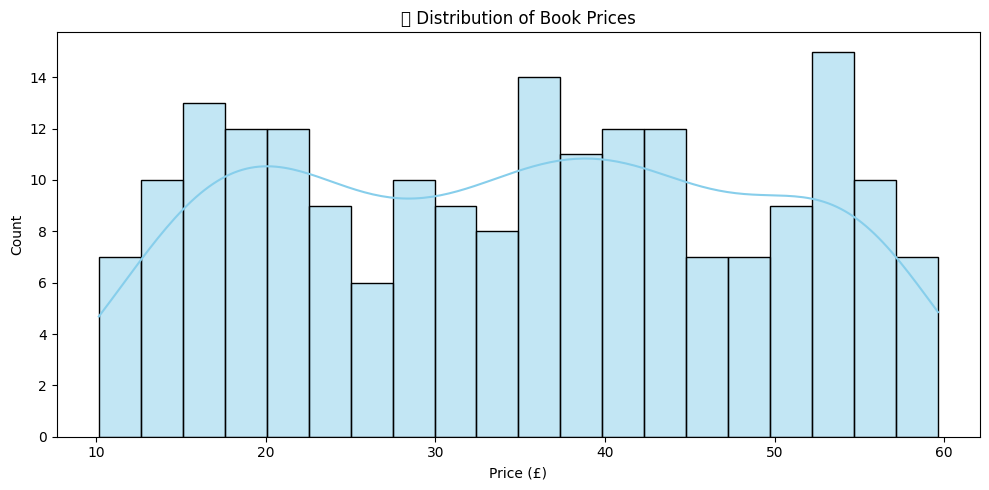

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.histplot(df['price (£)'], bins=20, kde=True, color='skyblue')
plt.title('📈 Distribution of Book Prices')
plt.xlabel('Price (£)')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


**Ratings Distribution**

<ipython-input-17-2479927491>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='rating_num', data=df, palette='viridis')
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 11088 (\N{WHITE MEDIUM STAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


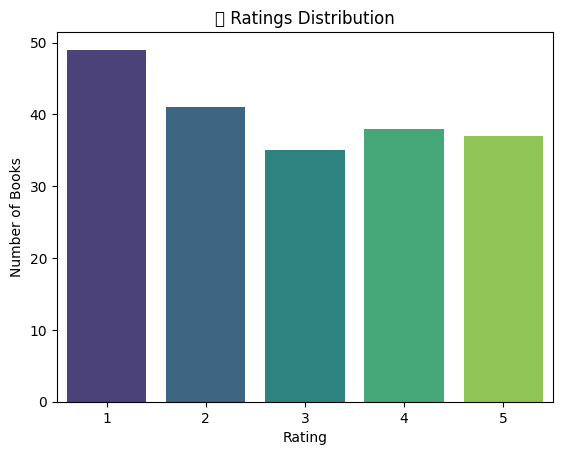

In [17]:
sns.countplot(x='rating_num', data=df, palette='viridis')
plt.title('⭐ Ratings Distribution')
plt.xlabel('Rating')
plt.ylabel('Number of Books')
plt.show()


In [ ]:
# plt.figure(figsize=(10, 6))
# sns.scatterplot(x='stock', y='price (£)', hue='rating_num', palette='coolwarm')
# plt.title('🛒 Stock vs Price by Rating')
# plt.xlabel('Stock Available')
# plt.ylabel('Price (£)')
# plt.legend(title='Rating')
# plt.show()


**Correlation Heatmap**

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


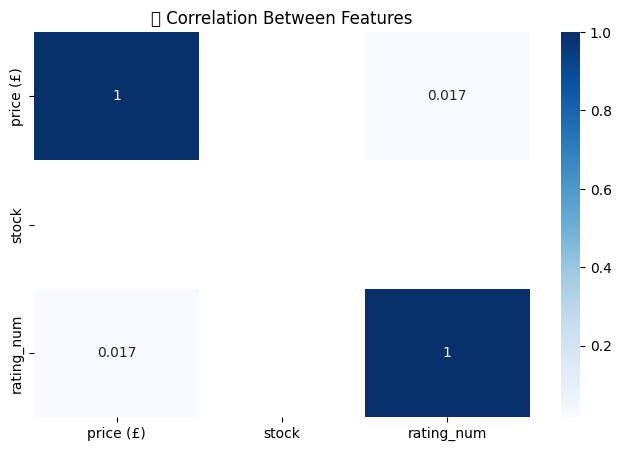

In [19]:
plt.figure(figsize=(8, 5))
sns.heatmap(df[['price (£)', 'stock', 'rating_num']].corr(), annot=True, cmap='Blues')
plt.title('📊 Correlation Between Features')
plt.show()


**Price Categories (Cheap, Medium, Expensive)**


Add a new column for price category:

In [21]:
def price_category(price):
    if price < 20:
        return 'Cheap'
    elif 20 <= price < 40:
        return 'Moderate'
    else:
        return 'Expensive'

df['price_category'] = df['price (£)'].apply(price_category)
print(df['price_category'].value_counts())


price_category
Expensive    79
Moderate     79
Cheap        42
Name: count, dtype: int64


Then visualize:

<ipython-input-22-2330339516>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='price_category', data=df, palette='Set2')
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128181 (\N{BANKNOTE WITH DOLLAR SIGN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


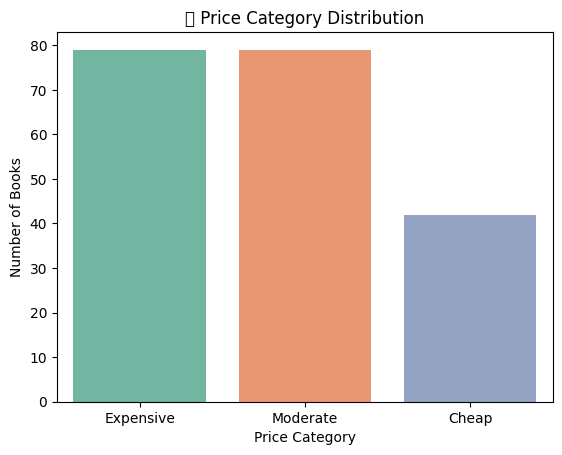

In [22]:
sns.countplot(x='price_category', data=df, palette='Set2')
plt.title('💵 Price Category Distribution')
plt.xlabel('Price Category')
plt.ylabel('Number of Books')
plt.show()


Save this enriched dataset:

In [24]:
df.to_csv("books_enriched_analysis.csv", index=False)


**5. Save Cleaned Data**

In [18]:
df.to_csv("books_cleaned_for_analysis.csv", index=False)

# Or save as Excel
df.to_excel("books_cleaned_for_analysis.xlsx", index=False)


# ***1. Regression Model: Predict Book Price***

Goal: Predict the price of a book based on its features.

Features you can use:

rating_num (1–5)

stock (number of available items)

price_category (encoded)

in_stock (binary)

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder

# Prepare data
df = pd.read_csv("books_enriched_analysis.csv")

# Encode categorical column
df['price_category_encoded'] = LabelEncoder().fit_transform(df['price_category'])

X = df[['rating_num', 'stock', 'price_category_encoded']]
y = df['price (£)']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
print("📊 MAE:", mean_absolute_error(y_test, y_pred))
print("📈 R² Score:", r2_score(y_test, y_pred))


📊 MAE: 13.488980484208994
📈 R² Score: -0.011149362530277651


# ***2. Classification Model: Predict Price Category (Cheap, Moderate, Expensive)***

Goal: Predict whether a book is cheap, moderate, or expensive.

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

y_class = df['price_category_encoded']
X_train, X_test, y_train, y_test = train_test_split(X, y_class, test_size=0.2, random_state=42)

clf = RandomForestClassifier()
clf.fit(X_train, y_train)
y_pred_class = clf.predict(X_test)

print(classification_report(y_test, y_pred_class))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00        17

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40

